In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score

%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid")

labels = ['A', 'B', 'C', 'D', '0']

In [45]:
file_path = 'score.csv'

with open(file_path, 'r', encoding='utf-8-sig') as f:
    first_line = f.readline()

df = pd.read_csv(file_path, encoding='utf-8-sig')

y_true = []
y_pred = []

for _, row in df.iterrows():
    y_true.extend(list(str(row['ground_truth_str'])))
    y_pred.extend(list(str(row['detected_str'])))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

print(f"✅ Data loaded: {len(df)} test sheets.")
print(f"📊 Total analysis points: {len(y_true)} items.")

✅ Data loaded: 41 test sheets.
📊 Total analysis points: 8200 items.


In [46]:
cm = confusion_matrix(y_true, y_pred, labels=labels)

tp = np.diag(cm)[:4].sum()   
tn = cm[4, 4]                
fn = cm[:4, 4].sum()         
fp = cm[:, :4].sum() - tp    

accuracy = (tp + tn) / len(y_true)
kappa = cohen_kappa_score(y_true, y_pred, labels=labels)

print(f"✅ Statistics generated. Accuracy: {accuracy:.2%}, Kappa: {kappa:.4f}")

✅ Statistics generated. Accuracy: 99.94%, Kappa: 0.9992


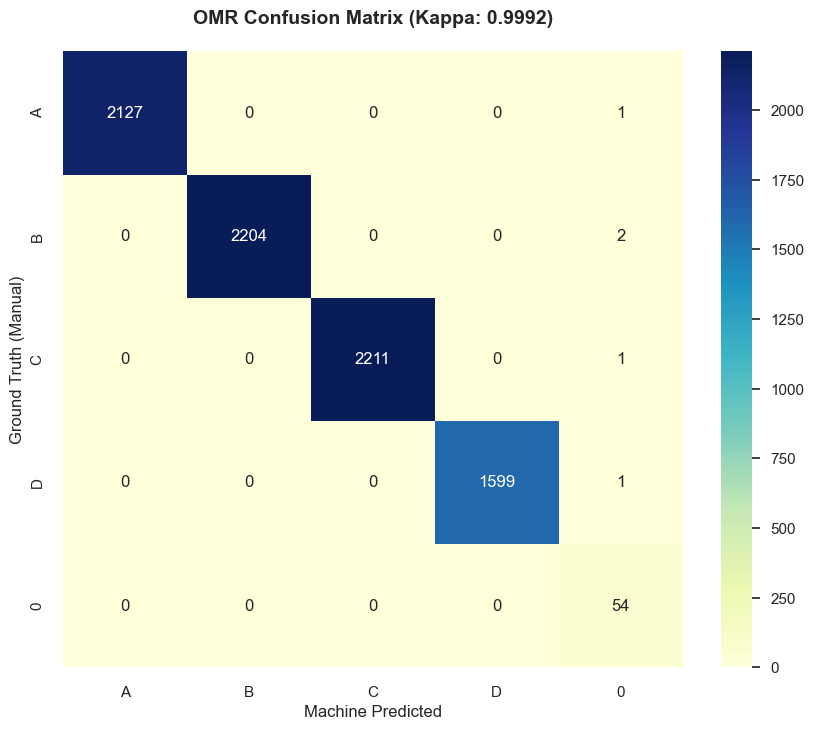

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=labels, yticklabels=labels)

plt.title(f'OMR Confusion Matrix (Kappa: {kappa:.4f})', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Machine Predicted', fontsize=12)
plt.ylabel('Ground Truth (Manual)', fontsize=12)
plt.show()

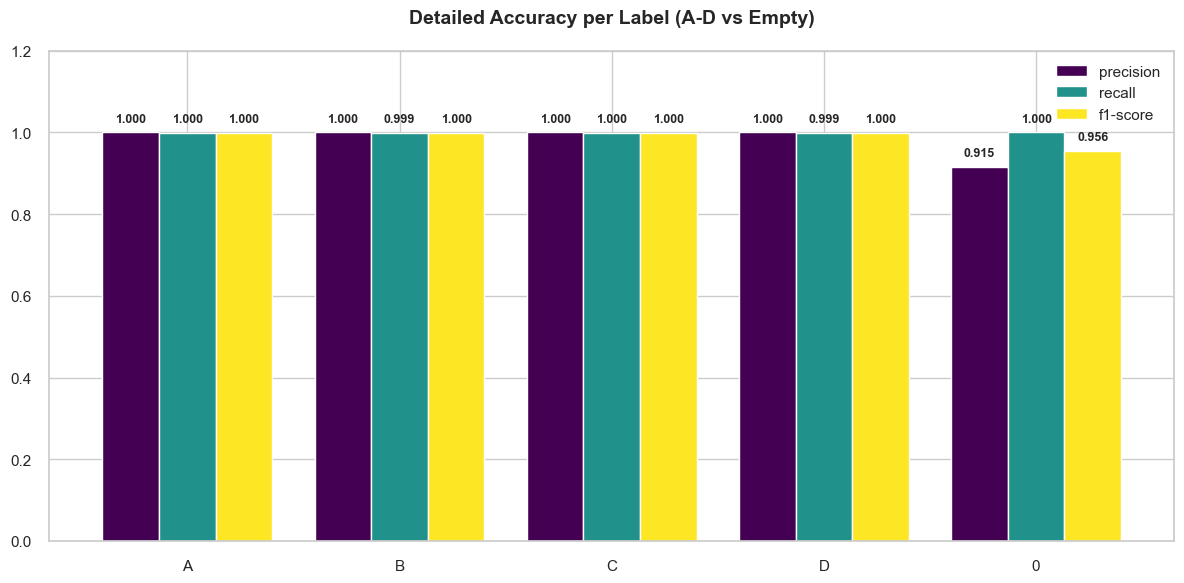

In [48]:
# Generate dictionary using the FIXED labels
report_dict = classification_report(y_true, y_pred, labels=labels, target_names=labels, output_dict=True)
metrics_df = pd.DataFrame(report_dict).transpose().iloc[:5, :3]

ax = metrics_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', width=0.8)

plt.title('Detailed Accuracy per Label (A-D vs Empty)', fontsize=14, fontweight='bold', pad=20)
plt.ylim(0, 1.2)
plt.xticks(rotation=0)
plt.legend(loc='upper right')

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

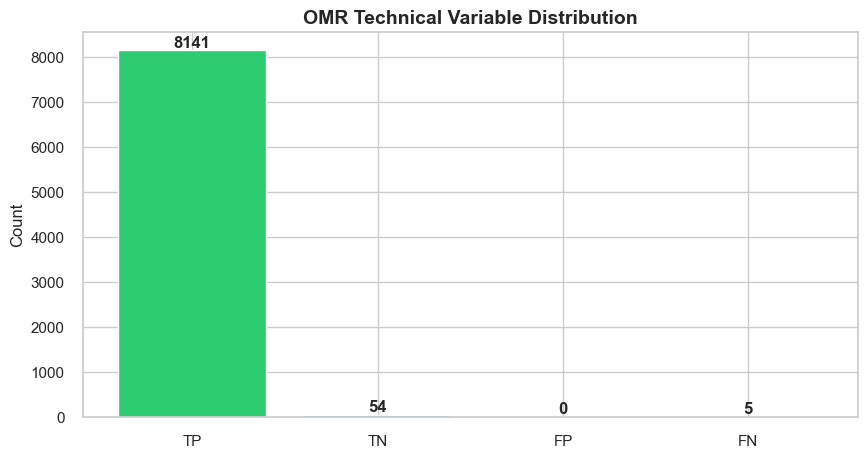

In [49]:
omr_vars = {'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn}

plt.figure(figsize=(10, 5))
colors = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12']
bars = plt.bar(omr_vars.keys(), omr_vars.values(), color=colors)

plt.title('OMR Technical Variable Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Count')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{int(bar.get_height())}', ha='center', va='bottom', fontweight='bold')

plt.show()

In [52]:
print(f"{'='*50}")
print(f"{'PERFORMANCE SUMMARY':^50}")
print(f"{'='*50}")
print(f"Overall Accuracy:       {accuracy:.2%}")
print(f"Cohen's Kappa Score:    {kappa:.4f}")
print(f"Total True Positives:   {tp}")
print(f"Total False Negatives:  {fn} (Missed Marks)")
print(f"Total False Positives:  {fp} (Ghost Marks)")
print(f"{'='*50}")

               PERFORMANCE SUMMARY                
Overall Accuracy:       99.94%
Cohen's Kappa Score:    0.9992
Total True Positives:   8141
Total False Negatives:  5 (Missed Marks)
Total False Positives:  0 (Ghost Marks)
